In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *

In [3]:
#Du doan gia nha
DATA_LOADER = pd.read_csv('cadata.csv') #doc tap du lieu
DATA_ATTR = DATA_LOADER.iloc[:, 1:] #cac gia tri cua thuoc tinh 
DATA_VALUES = DATA_LOADER.iloc[:, 0] #cot gia tri
# print(DATA_ATTR)

In [4]:
#Khao sat du lieu
col_names = DATA_LOADER.columns
print("Tap dataset co {} thuoc tinh\nbao gom cac thuoc tinh: {}".format(col_names.size, ", ".join(np.array(col_names[1:]))))
print("Cot gia tri cua du lieu can du doan la: {}".format(col_names[0]))
print("Du lieu co {} dong".format(DATA_LOADER.shape[0]))

Tap dataset co 9 thuoc tinh
bao gom cac thuoc tinh: MEDIAN INCOME, HOUSE MEDIAN AGE, TOTAL ROOM, TOTAL BEDROOMS, POPULATION, HOUSEHOLDS, LATITUDE, LONGITUDE
Cot gia tri cua du lieu can du doan la: MEDIAN HOUSE VALUE
Du lieu co 20640 dong


In [5]:
#Thong ke du lieu
sts_data = [
    {"name_attr": name_attr,
     "statis": {"mean": DATA_ATTR[name_attr].mean(),
                "std_dev": DATA_ATTR[name_attr].std(),
                "median": DATA_ATTR[name_attr].median()}
    } for name_attr in col_names[1: ]
]

# print(sts_data[0])

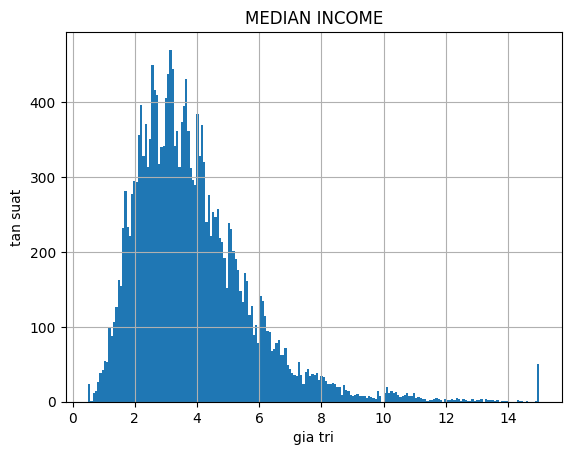

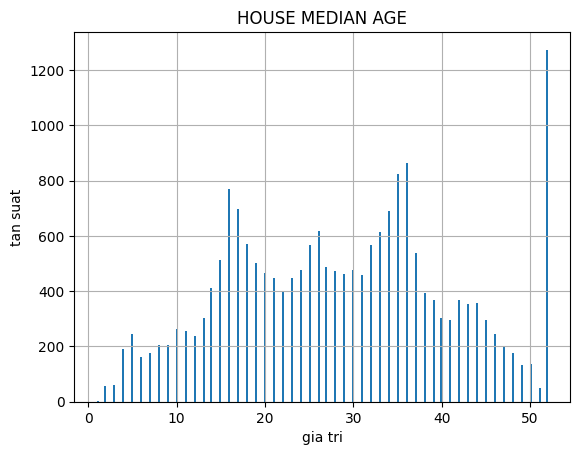

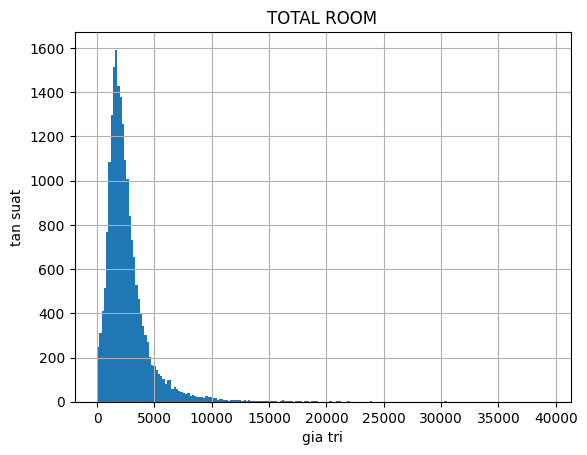

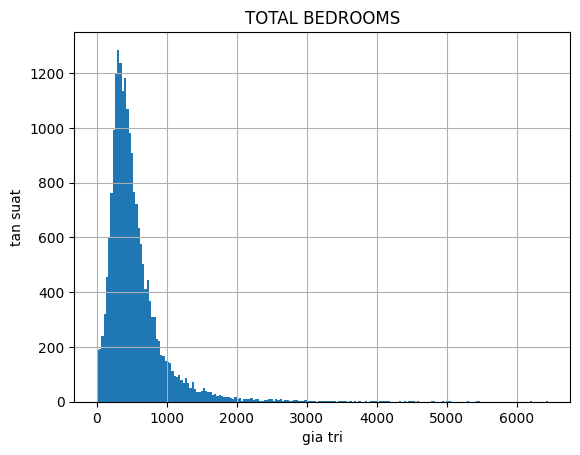

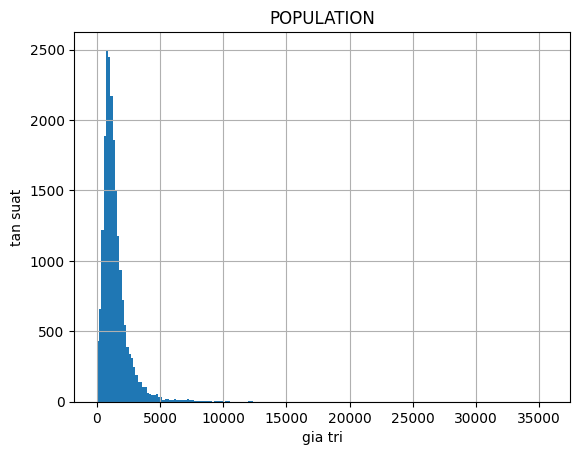

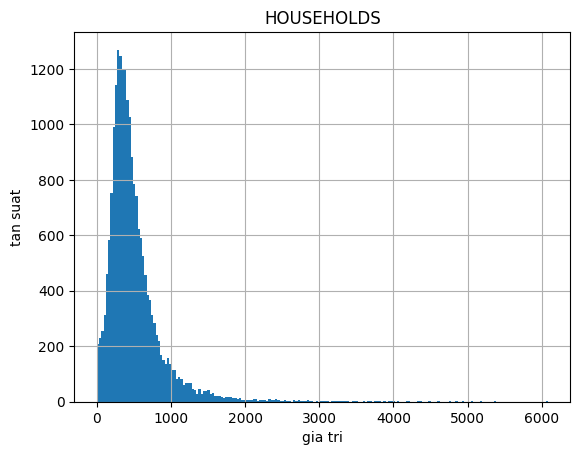

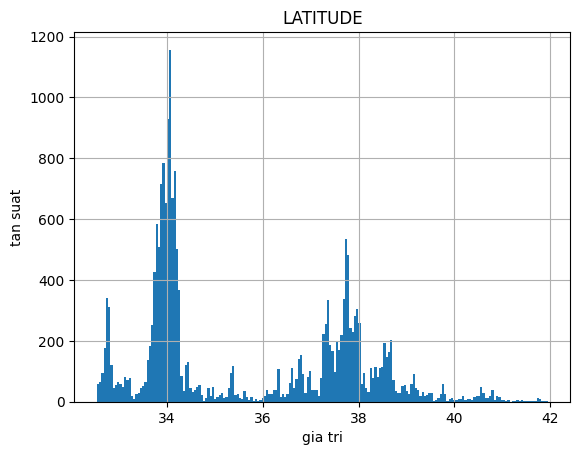

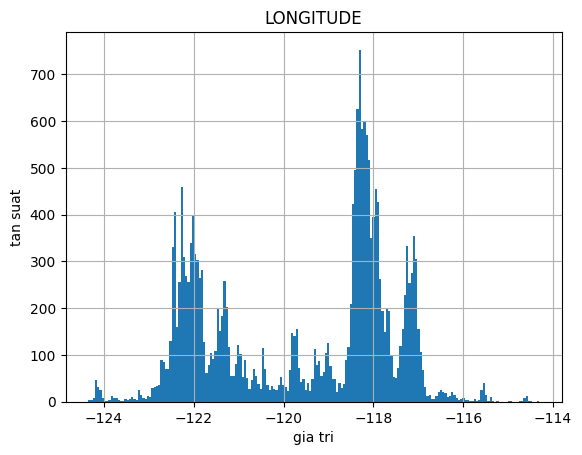

In [6]:
#Ve histogram
for attr in col_names[1: ]:
    values = np.array(DATA_ATTR[attr])
    plt.hist(values, bins=200)
    plt.title(attr)
    plt.xlabel('gia tri')
    plt.ylabel('tan suat')
    plt.grid(True)
    plt.show()

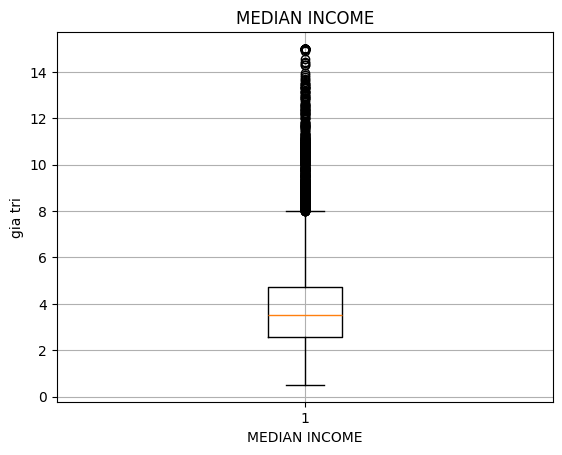

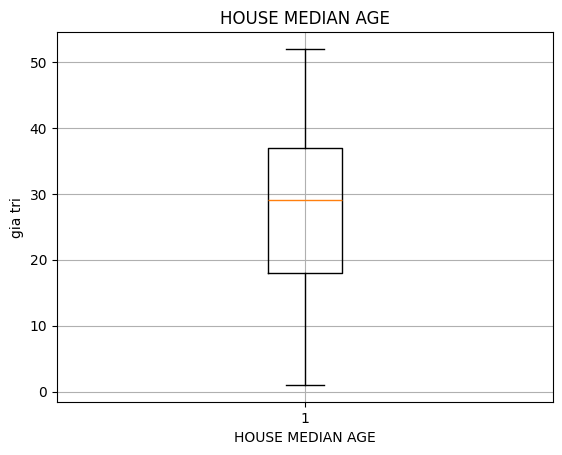

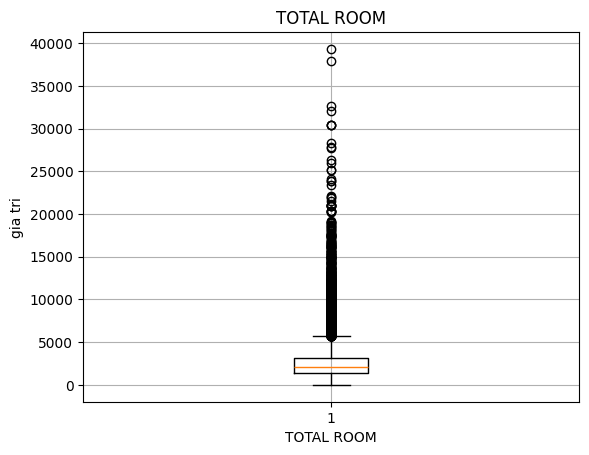

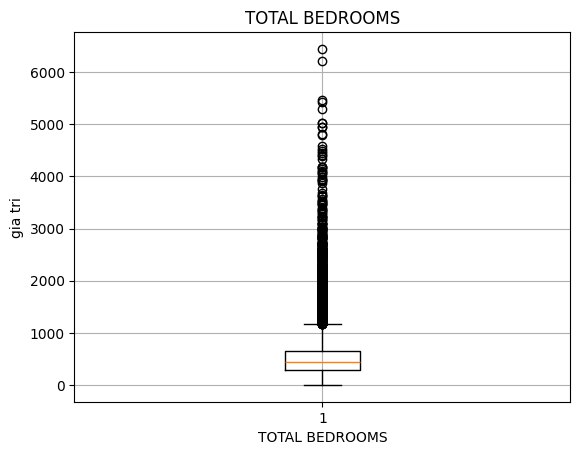

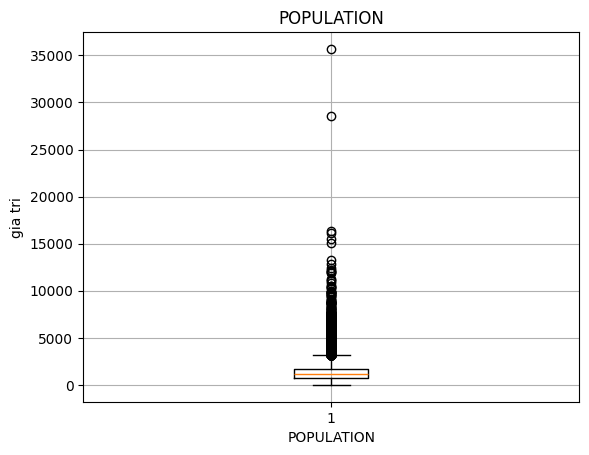

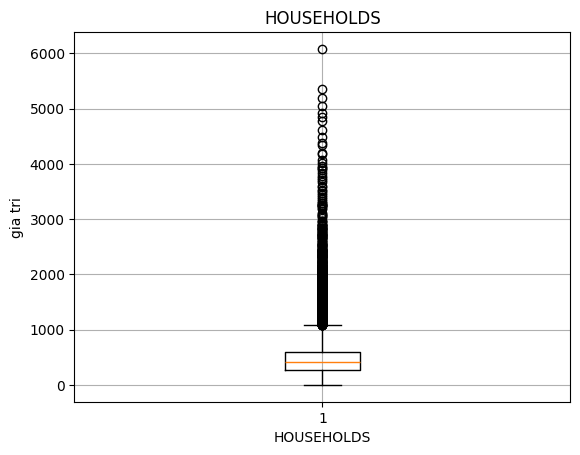

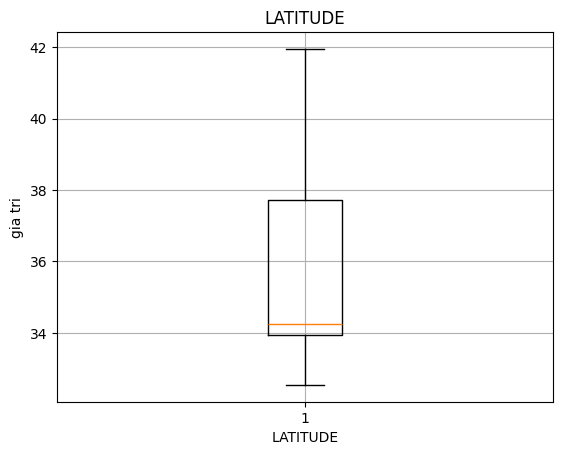

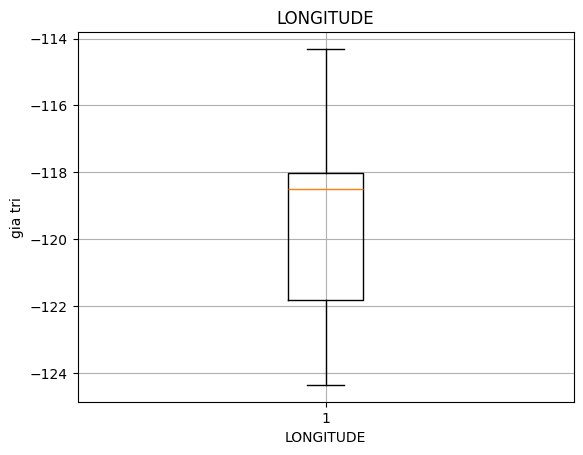

In [7]:
#Ve boxplot
for attr in col_names[1: ]:
    values = np.array(DATA_ATTR[attr])
    plt.boxplot(values)
    plt.title(attr)
    plt.xlabel(attr)
    plt.ylabel('gia tri')
    plt.grid(True)
    plt.show()

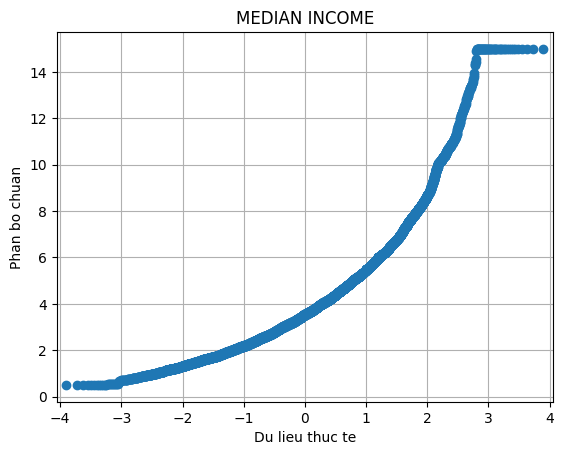

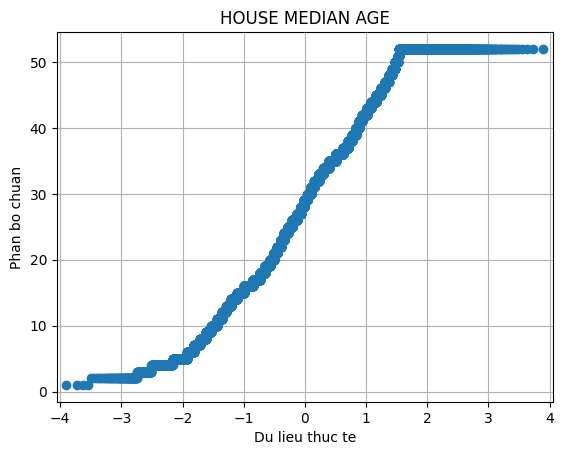

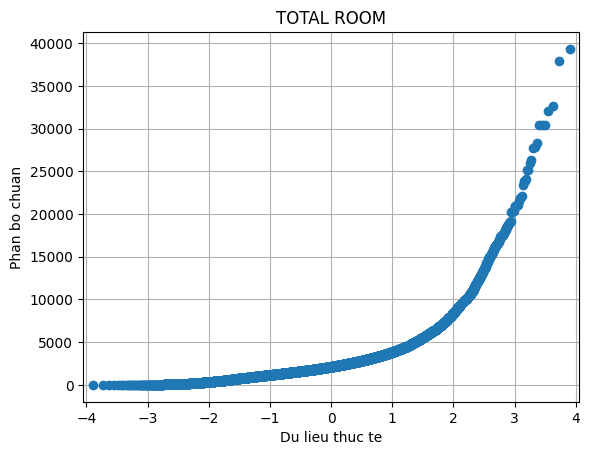

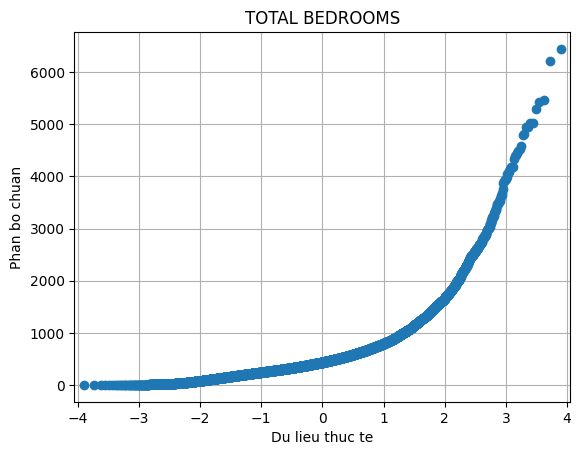

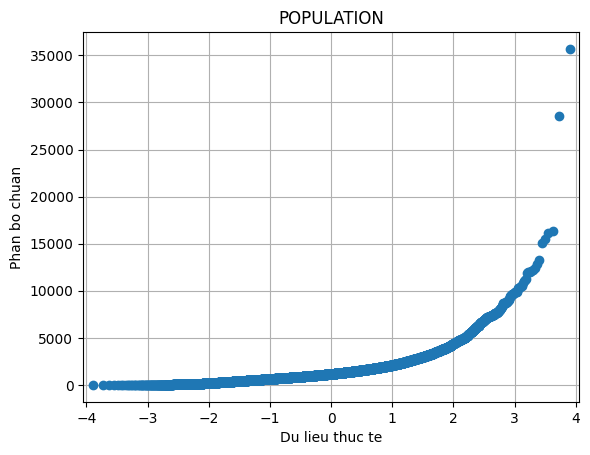

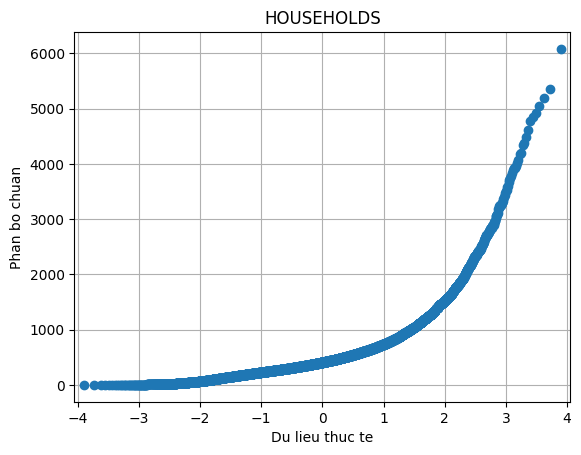

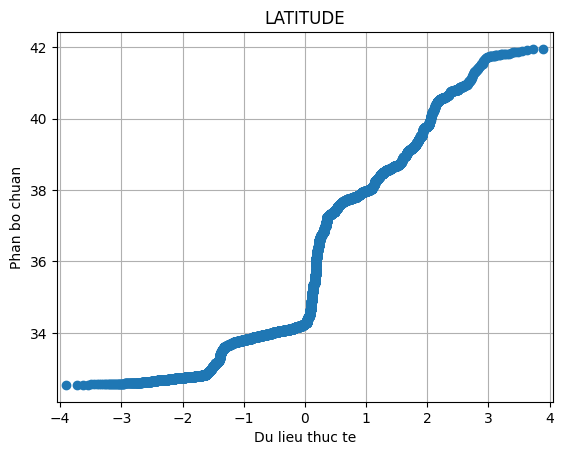

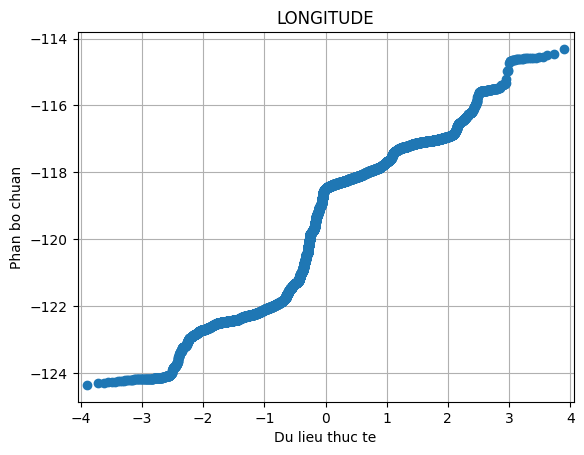

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
for attr in col_names[1: ]:
    values = np.array(DATA_ATTR[attr])
    sm.qqplot(values)    
    plt.title(attr)
    plt.xlabel("Du lieu thuc te")
    plt.ylabel('Phan bo chuan')
    plt.grid(True)
    plt.show()

In [9]:
#su dung KNN thuong
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, test_size=0.2, train_size=0.8, shuffle=True)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))



MSE: 9675831256.585447
RMSE: 98365.80328846732
MAE: 76491.23972868218


In [10]:
#hoi quy su dung KNN cho du lieu lien tuc
#voting = tong trung binh gia tri K diem du lieu
#su dung nghi thuc K-Fold
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import numpy as np
from statistics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error

knn = KNeighborsRegressor(n_neighbors=5)

kfold = KFold(n_splits=5, shuffle=True)
arr_mae = []
arr_mse = []
arr_rmse = []

#lap qua K-Fold
for train_index, test_index in kfold.split(DATA_ATTR):
    X_train, X_test = DATA_ATTR.iloc[train_index], DATA_ATTR.iloc[test_index]
    y_train, y_test = DATA_VALUES.iloc[train_index], DATA_VALUES.iloc[test_index]
    
    knn.fit(X_train, y_train) #train mo hinh
    y_predict = knn.predict(X_test)
    arr_mae.append(mean_absolute_error(y_test, y_predict))
    arr_mse.append(mean_squared_error(y_test, y_predict))
    arr_rmse.append(sqrt(mean_squared_error(y_test, y_predict)))
print("mean MAE: {}".format(np.mean(arr_mae)))
print("mean MSE: {}".format(np.mean(arr_mse)))
print("mean RMSE: {}".format(np.mean(arr_rmse)))


mean MAE: 76458.94528100775
mean MSE: 9803777923.416784
mean RMSE: 99011.95836885777


C:\Users\tvo22\AppData\Local\Temp\ipykernel_16292\4102804552.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=y_predict, y=y_test, cmap="Blues")


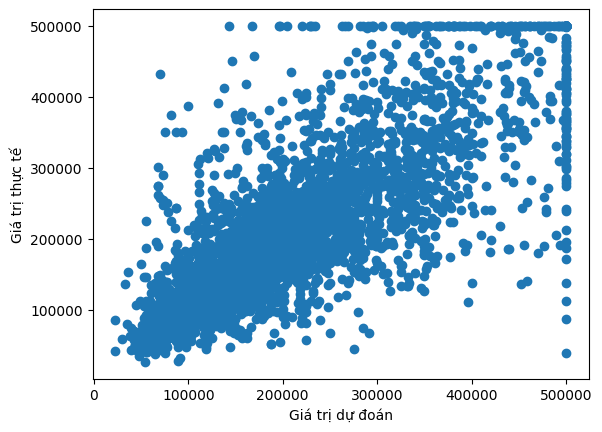

MAE: 44107.01550387597
MSE: 4666506052.218992
RMSE: 68311.82951889806


In [11]:
#cai dat giai thuat cay quyet dinh cho bai toan hoi quy
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, train_size=0.8, test_size=0.2, shuffle=True)
treeRegression = DecisionTreeRegressor() #cai dat mo hinh 
treeRegression.fit(X_train, y_train)

#du doan 
y_predict = treeRegression.predict(X_test)

plt.scatter(x=y_predict, y=y_test, cmap="Blues")
plt.xlabel("Giá trị dự đoán")
plt.ylabel('Giá trị thực tế')
plt.show()

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))

In [1]:
#cai dat cay quyet dinh + Bagging
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

treeRegression = DecisionTreeRegressor()

#cai dat Bagging voi 5/10/20 cay
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, test_size=0.2, train_size=0.8, shuffle=True)
for i in [5, 10, 20, 40, 80, 160]:
    bagging = BaggingRegressor(estimator=treeRegression, n_estimators=i, random_state=42)
    bagging.fit(X_train, y_train)
    y_predict = bagging.predict(X_test) #du doan

    plt.scatter(x=y_predict, y=y_test)
    plt.xlabel("Giá trị dự đoán")
    plt.ylabel("Giá trị thực tế")
    plt.show()

    print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
    print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
    print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
    print("------------------------------------------------")

#cây càng nhiều, các thông số càng giảm

NameError: name 'train_test_split' is not defined

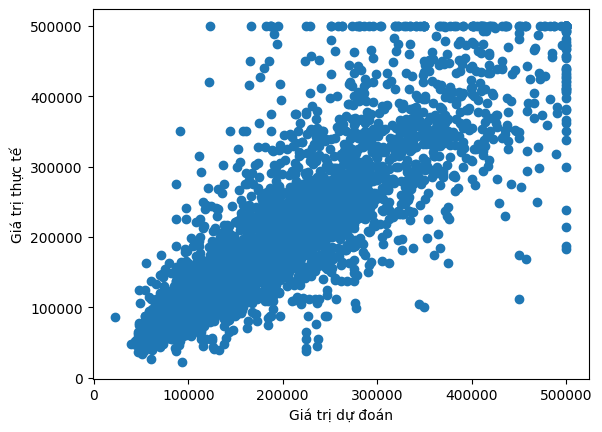

MAE: 35599.18144379845
MSE: 3160570607.151405
RMSE: 56218.952383972835
------------------------------------------------


In [13]:
#cài đặt với Adaboots
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, test_size=0.2, train_size=0.8, shuffle=True)
treeRegression = DecisionTreeRegressor()
adaboots = AdaBoostRegressor(estimator=treeRegression, n_estimators=5, learning_rate=0.001, random_state=42)
adaboots.fit(X_train, y_train)
y_predict = adaboots.predict(X_test) #du doan

plt.scatter(x=y_predict, y=y_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.show()

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
print("------------------------------------------------")

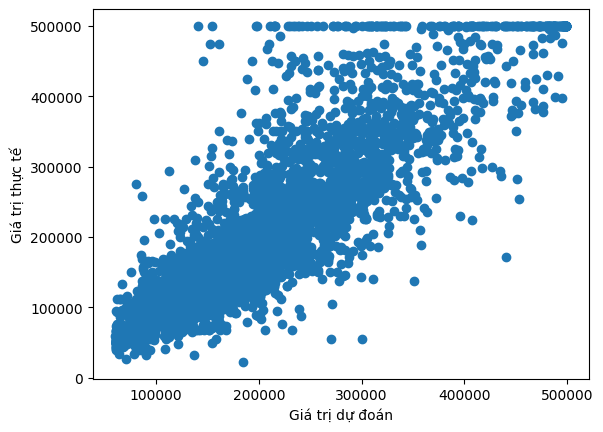

MAE: 40365.49097494777
MSE: 3447715158.880047
RMSE: 58717.247541757664
------------------------------------------------


In [14]:
#cài đặt rừng ngẫu nhiên
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, train_size=0.8, test_size=0.2, shuffle=True)

forest = RandomForestRegressor(
    n_estimators=100,
    bootstrap=True,
    max_depth=8
)

forest.fit(X_train, y_train)
y_predict = forest.predict(X_test) #du doan


plt.scatter(x=y_predict, y=y_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.show()

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
print("------------------------------------------------")

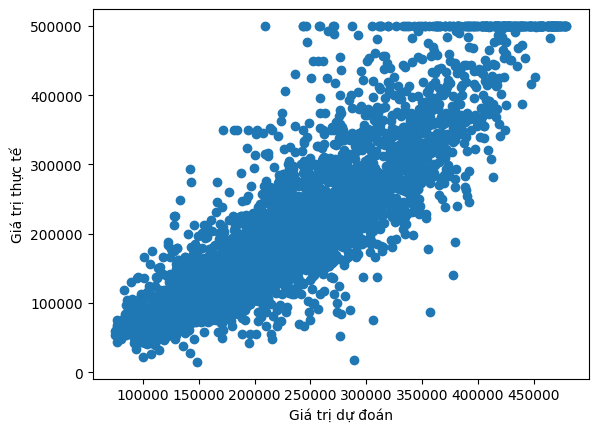

MAE: 48818.27549138463
MSE: 3664910568.013639
RMSE: 60538.50483794293
------------------------------------------------


In [15]:
#Random Forest + AdaBoost
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, train_size=0.8, test_size=0.2, shuffle=True)

forest = RandomForestRegressor(
    n_estimators=100,
    bootstrap=True,
    max_depth=8
)

# forest.fit(X_train, y_train)

adaboots = AdaBoostRegressor(estimator=forest, n_estimators=100)
adaboots.fit(X_train, y_train)

y_predict = adaboots.predict(X_test) #du doan

plt.scatter(x=y_predict, y=y_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.show()

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
print("------------------------------------------------")

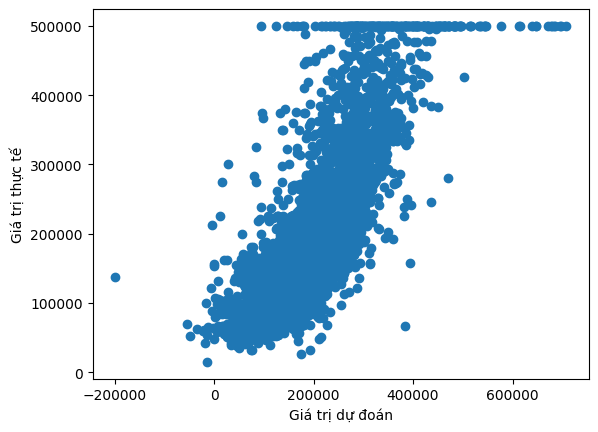

MAE: 51196.27844077848
MSE: 4916025127.630842
RMSE: 70114.37176236298
------------------------------------------------


In [16]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, test_size=0.2, train_size=0.8, shuffle=True)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_predict = linear.predict(X_test)

plt.scatter(x=y_predict, y=y_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.show()

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
print("------------------------------------------------")

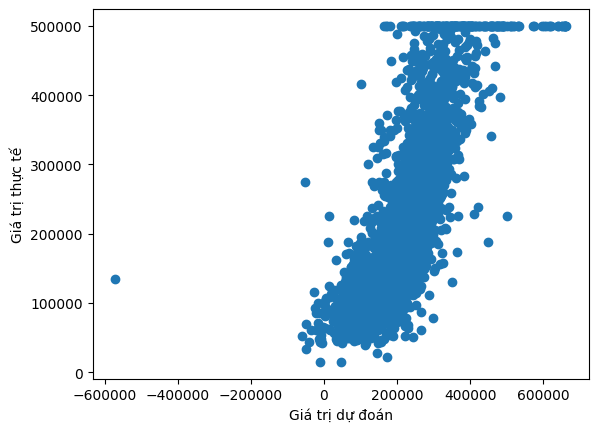

MAE: 53452.523600121385
MSE: 4952719729.688586
RMSE: 70375.56202041009
------------------------------------------------


In [17]:
#LinearRegression + adaboots
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, test_size=0.2, train_size=0.8, shuffle=True)

linear = LinearRegression()

adaboots = AdaBoostRegressor(estimator=linear, n_estimators=20)
adaboots.fit(X_train, y_train)
y_predict = adaboots.predict(X_test)

plt.scatter(x=y_predict, y=y_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.show()

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
print("------------------------------------------------")

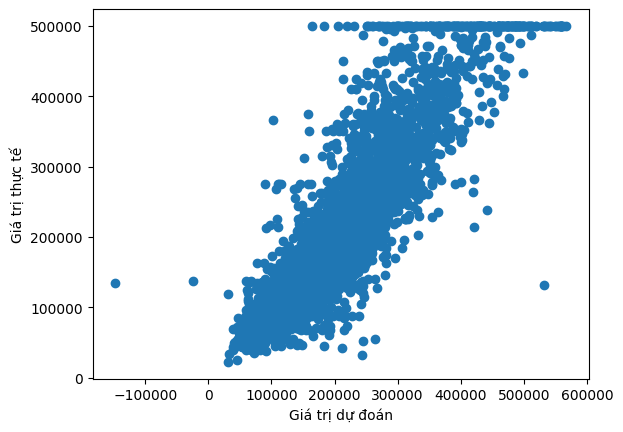

MAE: 37826.483598784915
MSE: 2956088797.2811913
RMSE: 54369.92548533786
------------------------------------------------


In [18]:
#cài đặt giải thuật votting 
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.model_selection import *
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, test_size=0.2, train_size=0.8, shuffle=True)

#TreeRegression + Bagging
#RandomForest 
#LinearRegression
#Votting

tree = DecisionTreeRegressor()
bagging = BaggingRegressor(estimator=tree, n_estimators=10)

forest = RandomForestRegressor(
    n_estimators=100,
    bootstrap=True,
    max_depth=8
)

linear = LinearRegression()

votting = VotingRegressor(estimators=[('bagging', bagging), ('forest', forest), ('linear', linear)])
votting.fit(X_train, y_train)

y_predict = votting.predict(X_test)


plt.scatter(x=y_predict, y=y_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.show()

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
print("------------------------------------------------")